### 2η Εργασία στο μάθημα “Τεχνικές εξόρυξης Δεδομένων”
#### Εαρινό Εξάμηνο 2018-19
##### ΘΕΜΑ: Ανάλυση, περιγραφή, και αξιολόγηση σε μεγάλα δεδομένα.


In [1]:
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Data - Data Preperation

In [2]:
df = pd.read_csv('./crime.csv', encoding = "ISO-8859-1")

/home/sofiakst/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['SHOOTING'] = df['SHOOTING'].fillna('N')

### Quest. 1:  
##### "Παρουσιάστε τα γραφήματα που δείχνουν το πλήθος των εγκλημάτων ανά χρόνο, ανά μήνα και ανά ημέρα. Επίσης το πλήθος των εγκλημάτων ανά περιοχή (DISTRICT)"

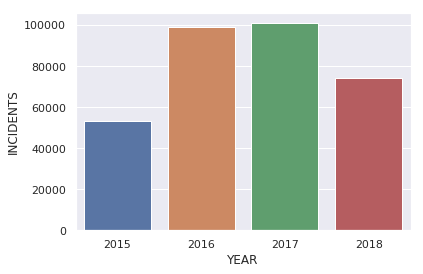

In [4]:
#df.groupby(['YEAR']).size()
yeardf = df[['YEAR', 'INCIDENT_NUMBER']].groupby(['YEAR'], as_index=False).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS'})
sns.set(style="darkgrid")
ax = sns.barplot(x='YEAR', y='INCIDENTS', data=yeardf)

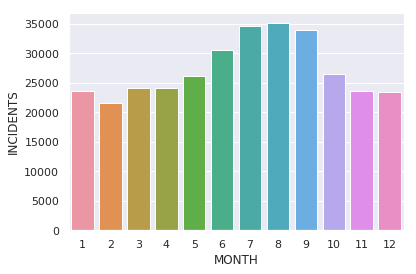

In [5]:
#df.groupby(['MONTH']).size()
monthdf = df[['MONTH', 'INCIDENT_NUMBER']].groupby(['MONTH'], as_index=False).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS'})
ax = sns.barplot(x='MONTH', y='INCIDENTS', data=monthdf)

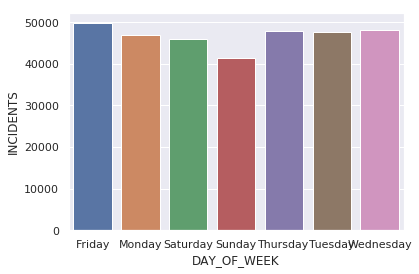

In [6]:
#df.groupby(['DAY_OF_WEEK']).size()
daydf = df[['DAY_OF_WEEK', 'INCIDENT_NUMBER']].groupby(['DAY_OF_WEEK'], as_index=False).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS'})
ax = sns.barplot(x='DAY_OF_WEEK', y='INCIDENTS', data=daydf)

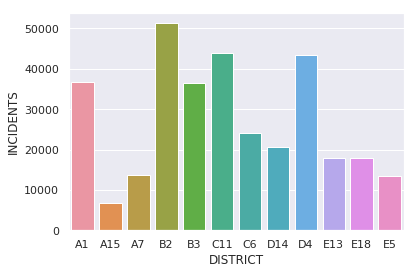

In [7]:
districtdf = df[['DISTRICT', 'INCIDENT_NUMBER']].groupby(['DISTRICT'], as_index=False).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS'})
ax = sns.barplot(x='DISTRICT', y='INCIDENTS', data=districtdf)

### Quest. 2:  
##### "Μελετήστε τα δεδομένα χρησιμοποιώντας την στήλη Shootings. Ποια χρονιά έχουμε τα περισσότερα shootings; Σε ποια περιοχή (DISTRICT) εμφανίζονται τα περισσότερα περιστατικά shootings;"

Year with most shootings: 2017


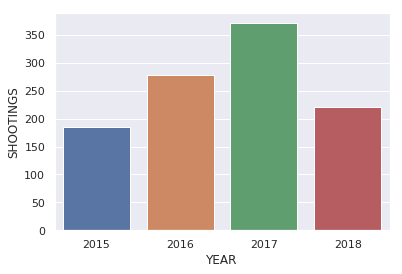

In [8]:
shootings = df.loc[df['SHOOTING'] == 'Y']
shootingsy = shootings[['YEAR', 'SHOOTING']].groupby(['YEAR'], as_index=True).count().rename(columns={'SHOOTING' : 'SHOOTINGS'})
print ("Year with most shootings: " + str(shootingsy['SHOOTINGS'].idxmax()))
shootingsy = shootings[['YEAR', 'SHOOTING']].groupby(['YEAR'], as_index=False).count().rename(columns={'SHOOTING' : 'SHOOTINGS'})
ax = sns.barplot(x='YEAR', y='SHOOTINGS', data=shootingsy)

District with most shootings: B2


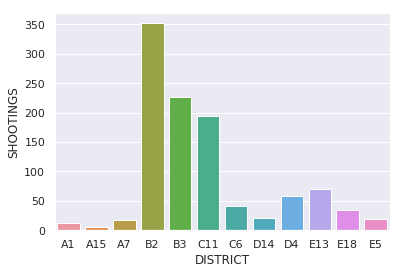

In [9]:
shootingsd  = shootings[['DISTRICT', 'SHOOTING']].groupby(['DISTRICT'], as_index=True).count().rename(columns={'SHOOTING' : 'SHOOTINGS'})
print ("District with most shootings: " + str(shootingsd['SHOOTINGS'].idxmax()))
shootingsd  = shootings[['DISTRICT', 'SHOOTING']].groupby(['DISTRICT'], as_index=False).count().rename(columns={'SHOOTING' : 'SHOOTINGS'})
ax = sns.barplot(x='DISTRICT', y='SHOOTINGS', data=shootingsd)

### Quest. 3:
##### "Χρησιμοποιήστε την πληροφορία από τη στήλη ‘HOUR’ και φτιάξτε μία καινούρια στήλη που αντιπροσωπεύει την πληροφορία “Day or Night”. Αν η ώρα είναι μεταξύ 18:00 μμ - 06:00 πμ θεωρούμε ότι είναι νύχτα, αλλιώς θεωρούμε ότι είναι μέρα. Είναι περισσότερα τα εγκλήματα την ημέρα ή τη νύχτα;"

More crimes are commited during night time:


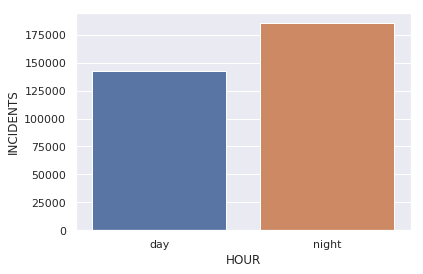

In [10]:
df['DAY_OR_NIGHT'] = np.where((df['HOUR']<16)&(df['HOUR']>6), 'day', 'night')
df.head()
sns.set(style="darkgrid")
dayornight = df[['DAY_OR_NIGHT', 'INCIDENT_NUMBER']].groupby(['DAY_OR_NIGHT'], as_index=True).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS', 'DAY_OR_NIGHT' : 'HOUR'})
print ("More crimes are commited during " + str(dayornight['INCIDENTS'].idxmax()) + " time:")
dayornight = df[['DAY_OR_NIGHT', 'INCIDENT_NUMBER']].groupby(['DAY_OR_NIGHT'], as_index=False).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS', 'DAY_OR_NIGHT' : 'HOUR'})
ax = sns.barplot(x='HOUR', y='INCIDENTS', data=dayornight)

### Quest. 4:
##### "Συνδιάστε την νέα στήλη που προέκυψε (Day or Night) με την στήλη “OFFENSE_CODE_GROUP“ και απαντήστε στην ερώτηση: Ποιος είναι ο πιο συχνός τύπος εγκλήματος που συμβαίνει την ημέρα;"

Most crimes are "Motor Vehicle Accident Response" type of crime


[]

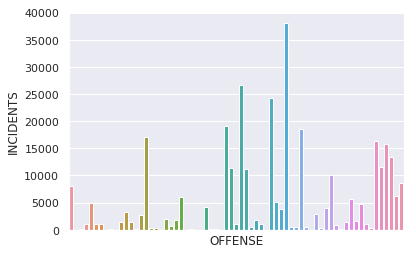

In [11]:
daydf = df.loc[df['DAY_OR_NIGHT'] == 'day']
offense = df[['OFFENSE_CODE_GROUP', 'INCIDENT_NUMBER']].groupby(['OFFENSE_CODE_GROUP'], as_index=True).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS', 'OFFENSE_CODE_GROUP' : 'OFFENSE'})
print ("Most crimes are \"" + str(offense['INCIDENTS'].idxmax()) + "\" type of crime")
offense = df[['OFFENSE_CODE_GROUP', 'INCIDENT_NUMBER']].groupby(['OFFENSE_CODE_GROUP'], as_index=False).count().rename(columns={'INCIDENT_NUMBER' : 'INCIDENTS', 'OFFENSE_CODE_GROUP' : 'OFFENSE'})
#dims = (16, 10)
#ax = plt.subplots(figsize=dims)
ax = sns.barplot(x='OFFENSE', y='INCIDENTS', data=offense)
ax.set_xticks([])

### Quest. 5:
##### " Χρησιμοποιώντας τις στήλες Lat και Log και την βιβλιοθήκη KMeans θα εφαρμόσετε clustering με βάση την γεωγραφική τοποθεσία. Δοκιμάστε τον KMeans με 2,3,5,10 clusters. Στη συνέχεια συνδιάστε περισσότερες στήλες από τα δεδομένα σας και εφαρμόστε το clustering, δηλαδή με (location, OFFENSE_CODE) και (location, MONTH)."

##### DATASET 1 - Lat, Long

In [12]:
sd = df[['Lat', 'Long']]
sd = sd[sd.Lat > 0.]

dataset = []
for index, row in sd.iterrows():
    lat = row['Lat']
    lon = row['Long']
    dataset.append([float(lon), float(lat)])

dataset = np.array(dataset)


##### DATASET 2 - Lat, Long, OFFENSE_CODE

In [13]:
sd2 = df[['Lat', 'Long', 'OFFENSE_CODE']]
sd2 = sd2[sd2.Lat > 0.]

dataset2 = []
for index, row in sd2.iterrows():
    lat = row['Lat']
    lon = row['Long']
    off = row['OFFENSE_CODE']
    dataset2.append([float(lon), float(lat), off])

dataset2 = np.array(dataset2)


##### DATASET 3 - Lat, Long, MONTH

In [14]:
sd3 = df[['Lat', 'Long', 'MONTH']]
sd3 = sd3[sd3.Lat > 0.]

dataset3 = []
for index, row in sd3.iterrows():
    lat = row['Lat']
    lon = row['Long']
    mon = row['MONTH']
    dataset3.append([float(lon), float(lat), mon])

dataset3 = np.array(dataset3)

##### Plot before KMeans

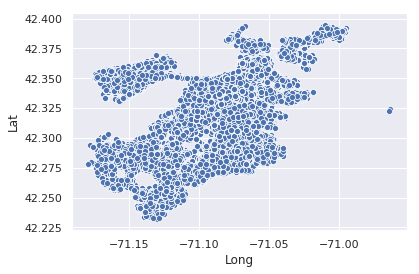

In [15]:
ax = sns.scatterplot(x='Long', y='Lat', data=sd)

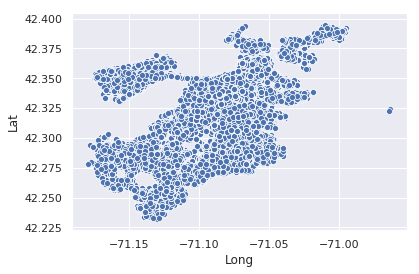

In [16]:
ax2 = sns.scatterplot(x='Long', y='Lat', data=sd2)

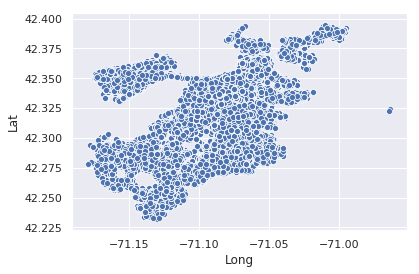

In [17]:
ax3 = sns.scatterplot(x='Long', y='Lat', data=sd3)

In [18]:
#sd = df[['Lat', 'Long', 'Location']]
#sd = sd.dropna(axis=0, how='any')
#sd = sd.sort_values(by=['Lat'])
#sd.head()
#sd.to_csv('./crime_sort.csv')

#### KMeans

In [19]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

##### 2 CLusters

Dataset 1

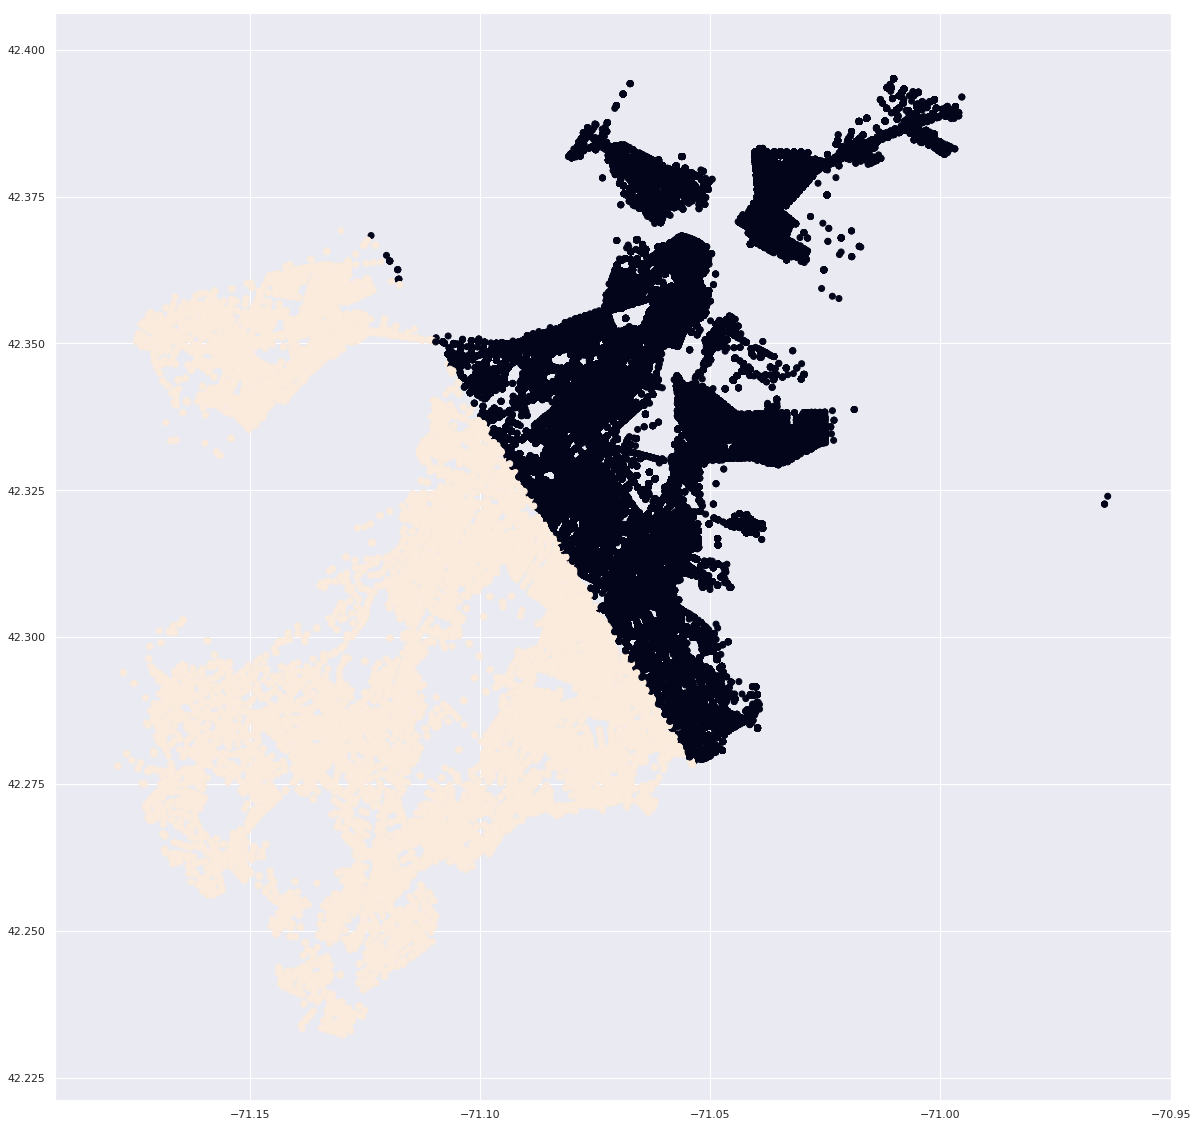

In [20]:
km = KMeans(n_clusters = 2)
km.fit(scale(dataset))
plt.figure(figsize = (20,20))
plt.scatter(sd['Long'], sd['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 2

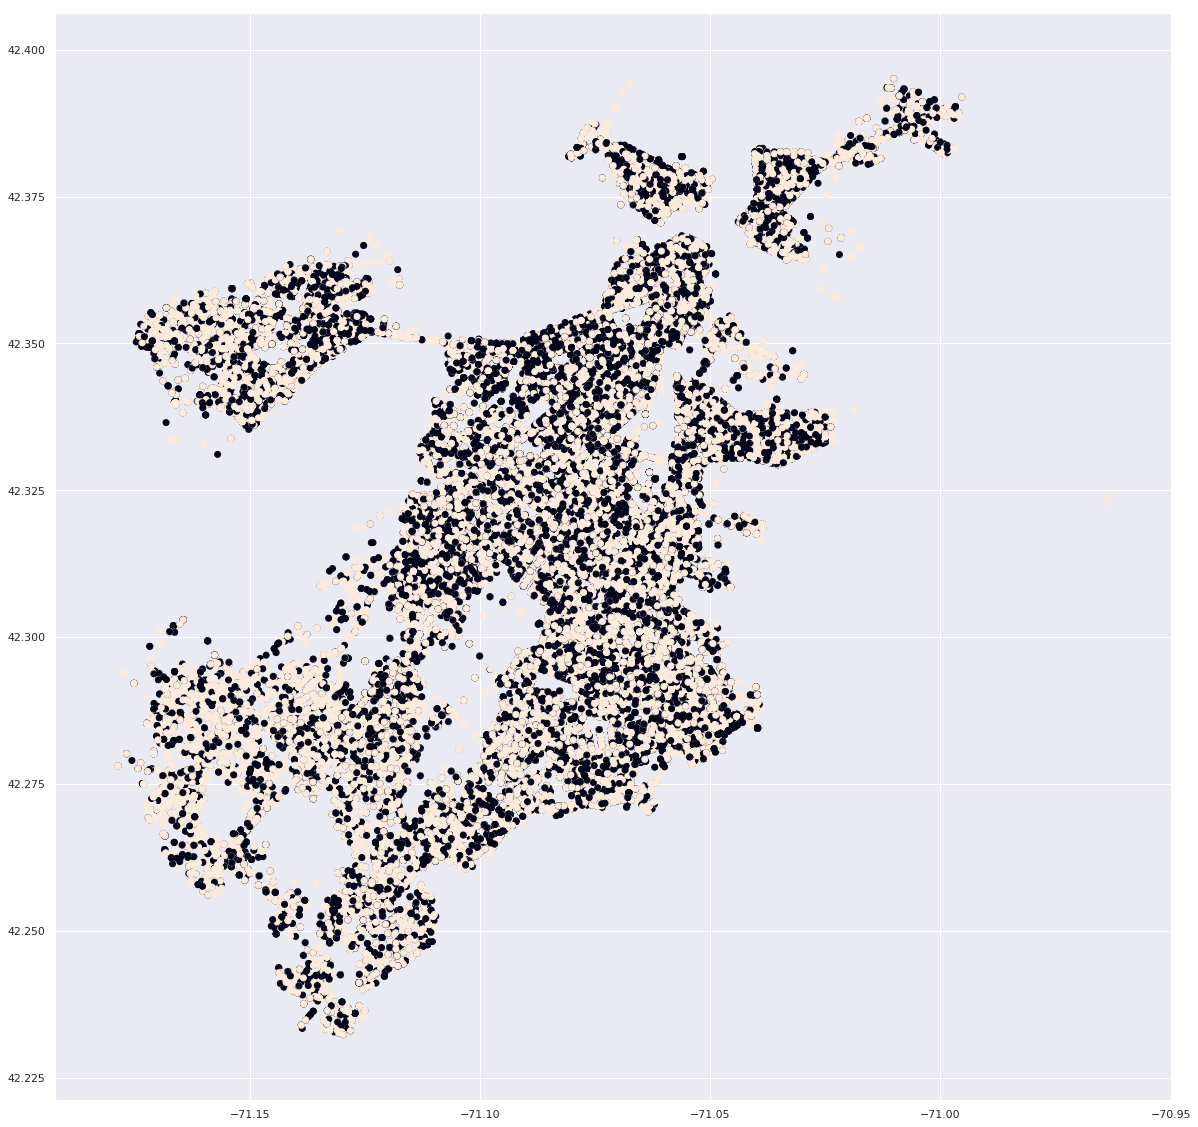

In [21]:
km = KMeans(n_clusters = 2)
km.fit(scale(dataset2))
plt.figure(figsize = (20,20))
plt.scatter(sd2['Long'], sd2['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 3

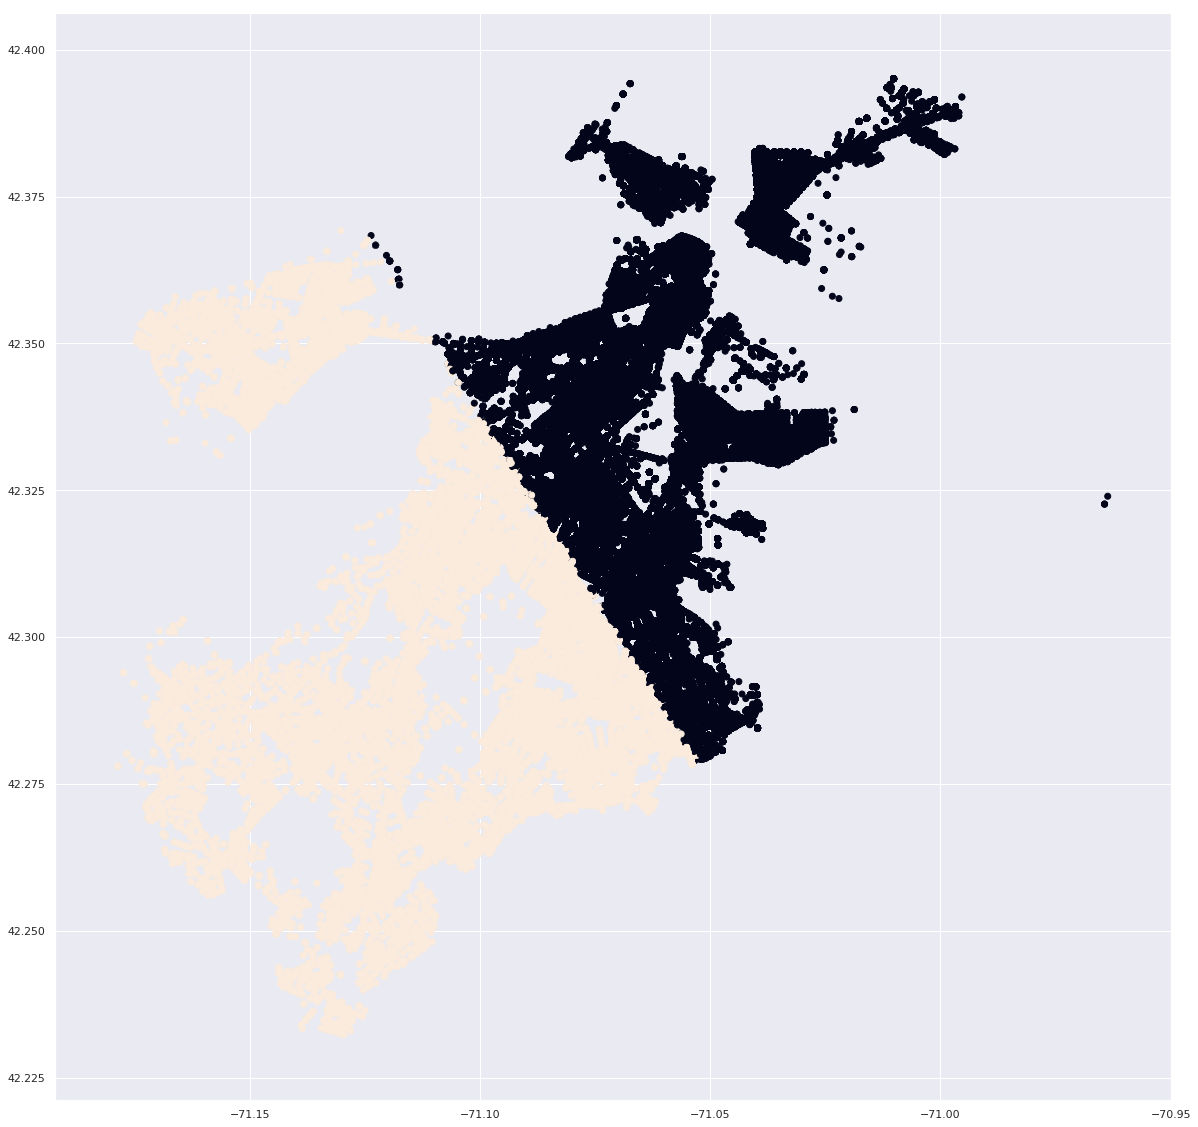

In [22]:
km = KMeans(n_clusters = 2)
km.fit(scale(dataset3))
plt.figure(figsize = (20,20))
plt.scatter(sd3['Long'], sd3['Lat'], c=km.labels_.astype(float))
plt.show()

##### 3 CLusters

Dataset 1

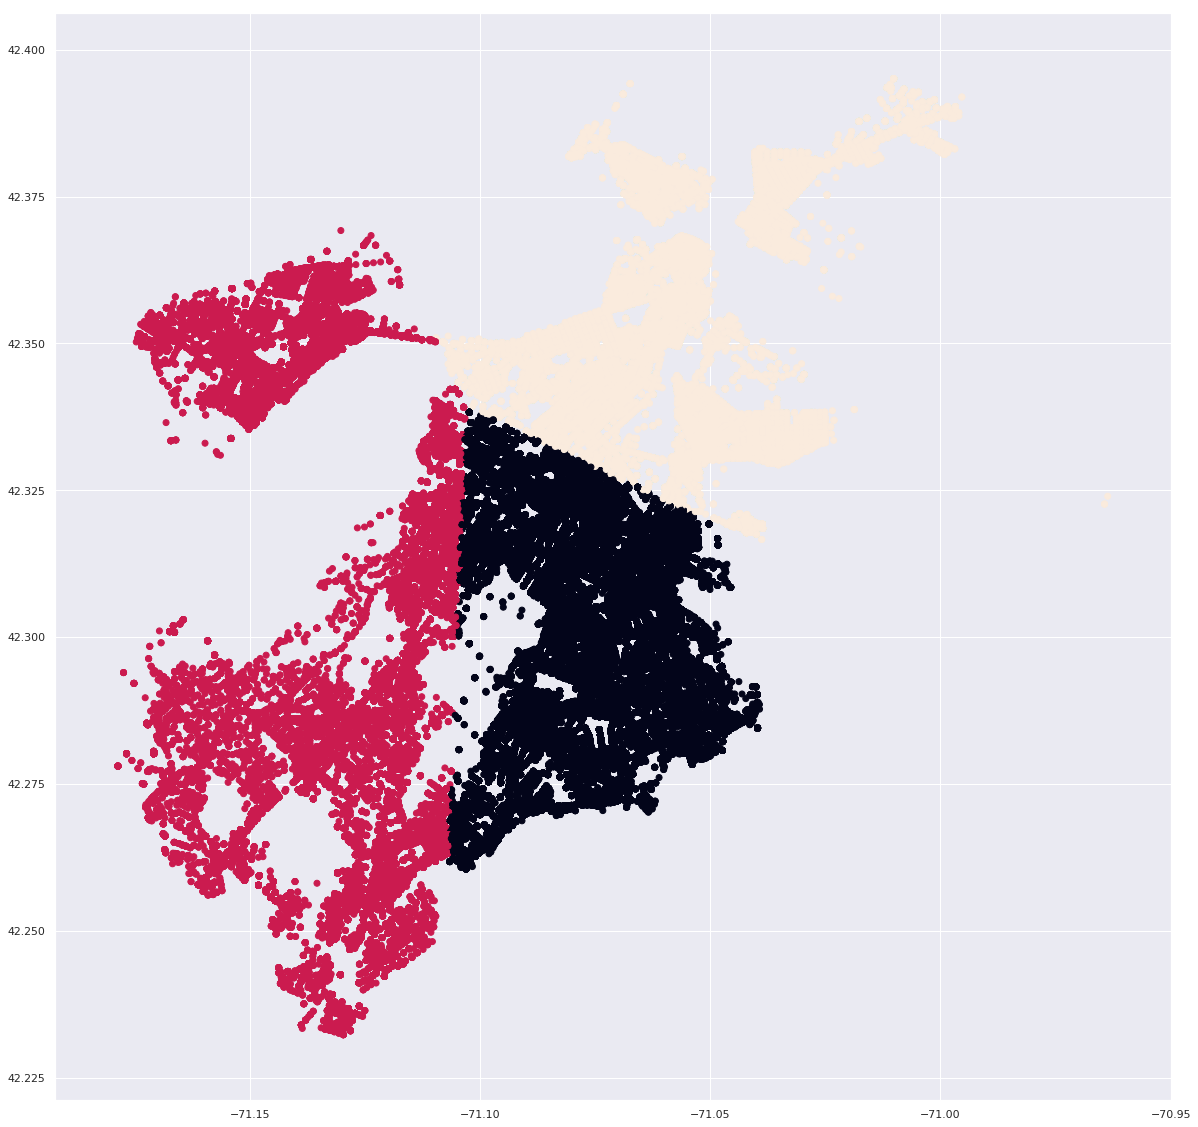

In [23]:
km = KMeans(n_clusters = 3)
km.fit(scale(dataset))
plt.figure(figsize = (20,20))
plt.scatter(sd['Long'], sd['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 2

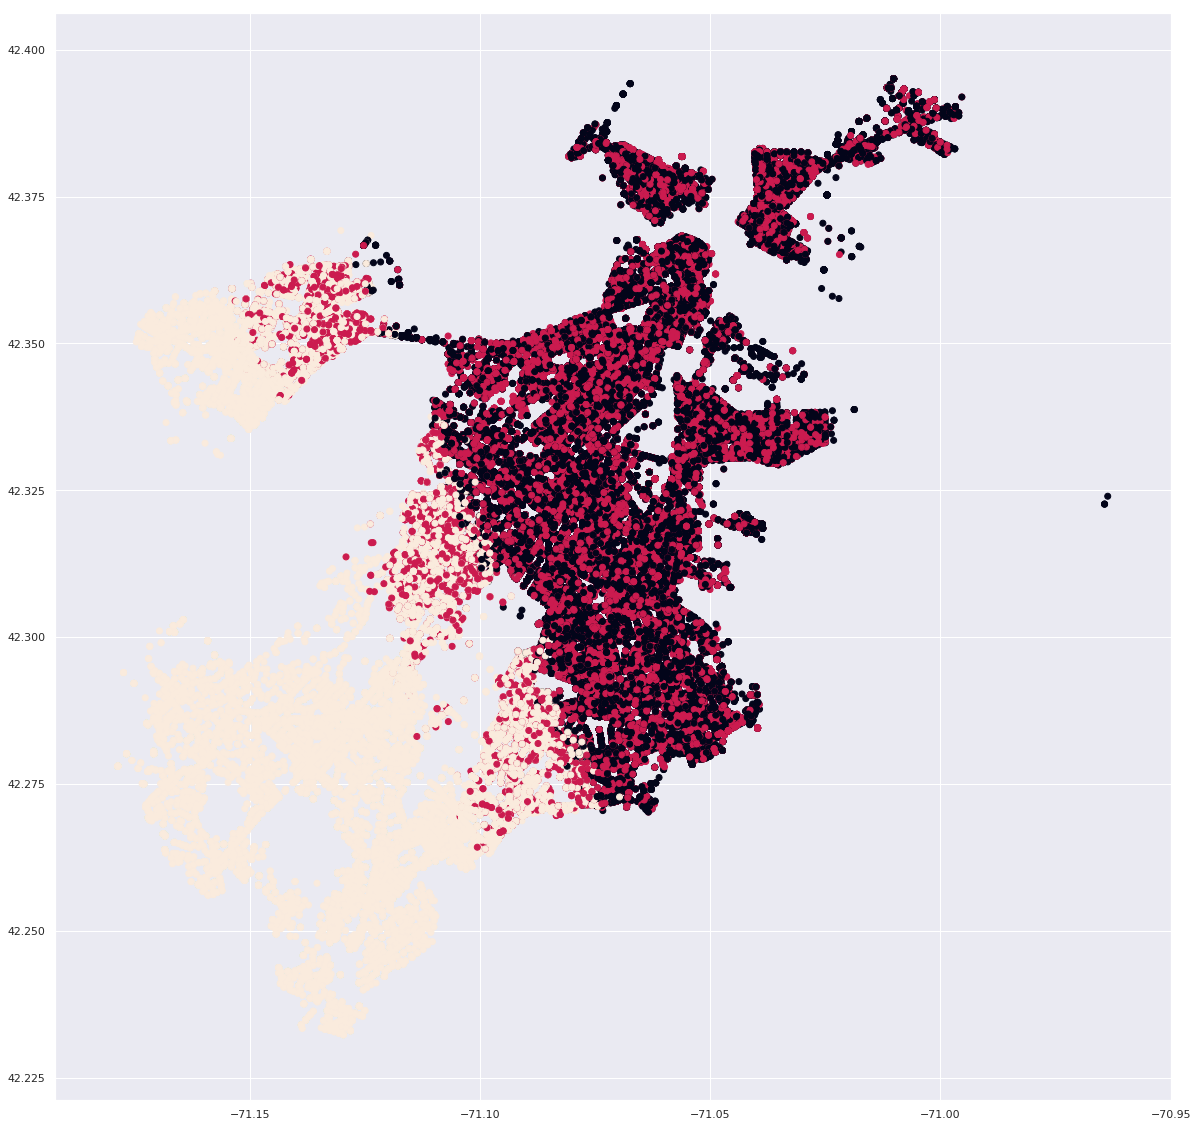

In [24]:
km = KMeans(n_clusters = 3)
km.fit(scale(dataset2))
plt.figure(figsize = (20,20))
plt.scatter(sd2['Long'], sd2['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 3

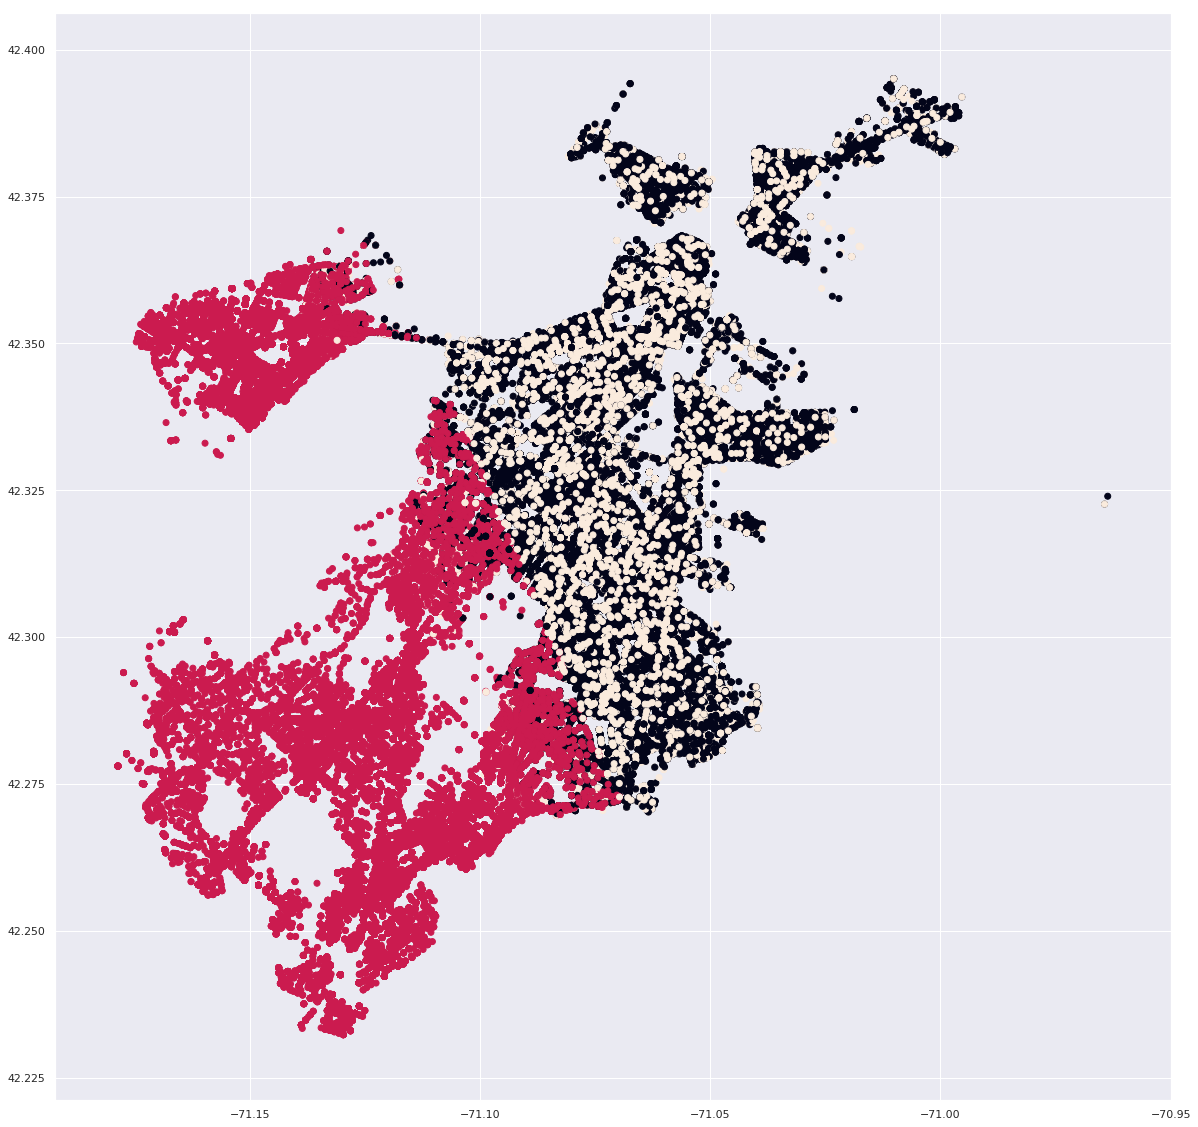

In [25]:
km = KMeans(n_clusters = 3)
km.fit(scale(dataset3))
plt.figure(figsize = (20,20))
plt.scatter(sd3['Long'], sd3['Lat'], c=km.labels_.astype(float))
plt.show()

##### 5 CLusters

Dataset 1

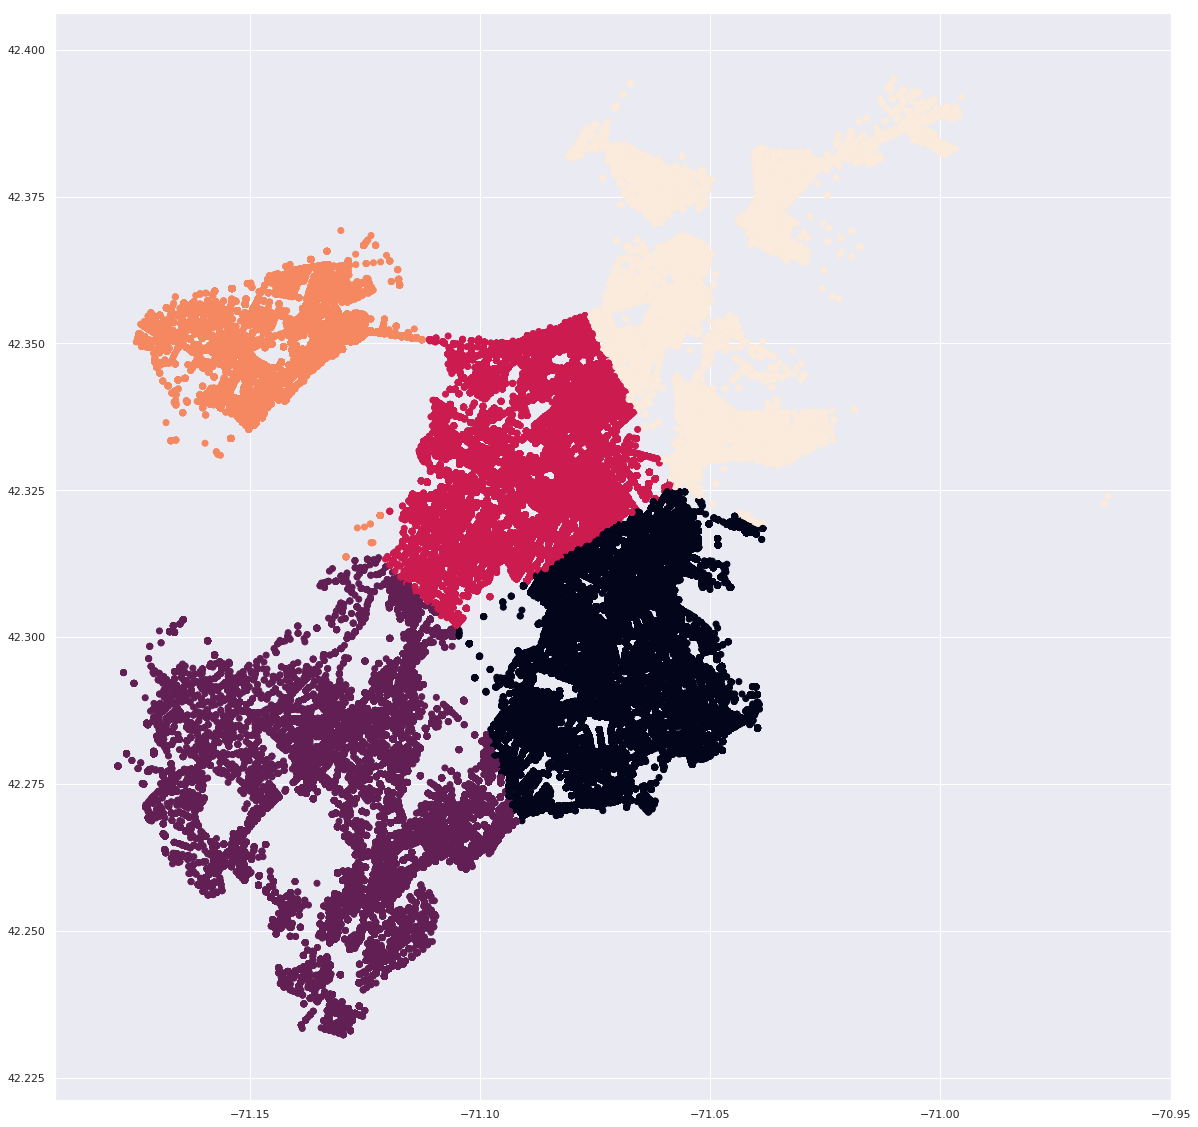

In [26]:
km = KMeans(n_clusters = 5)
km.fit(scale(dataset))
plt.figure(figsize = (20,20))
plt.scatter(sd['Long'], sd['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 2

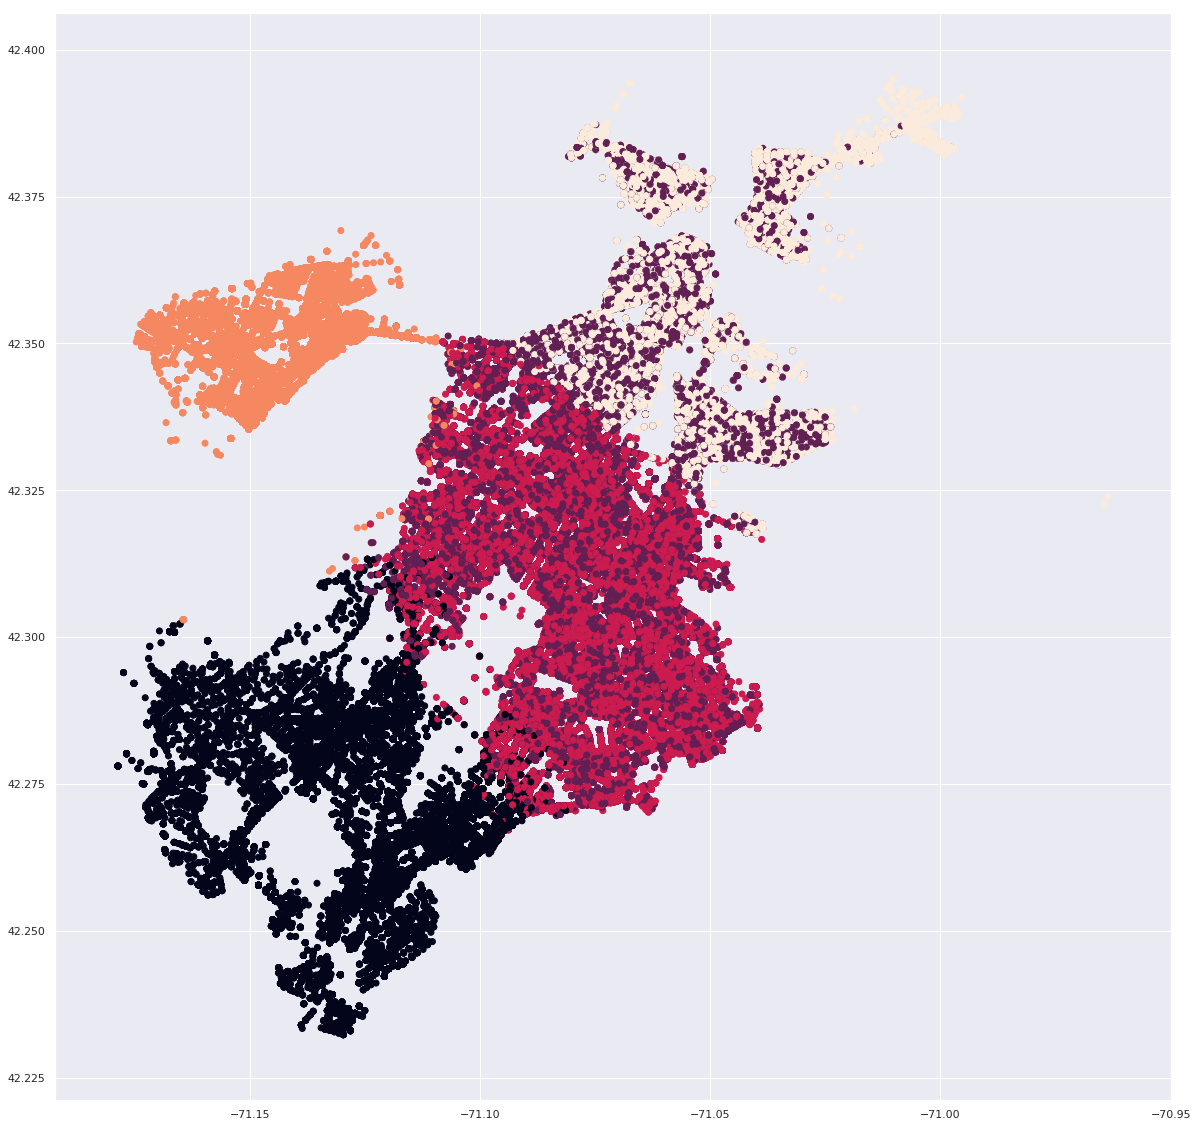

In [27]:
km = KMeans(n_clusters = 5)
km.fit(scale(dataset2))
plt.figure(figsize = (20,20))
plt.scatter(sd2['Long'], sd2['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 3

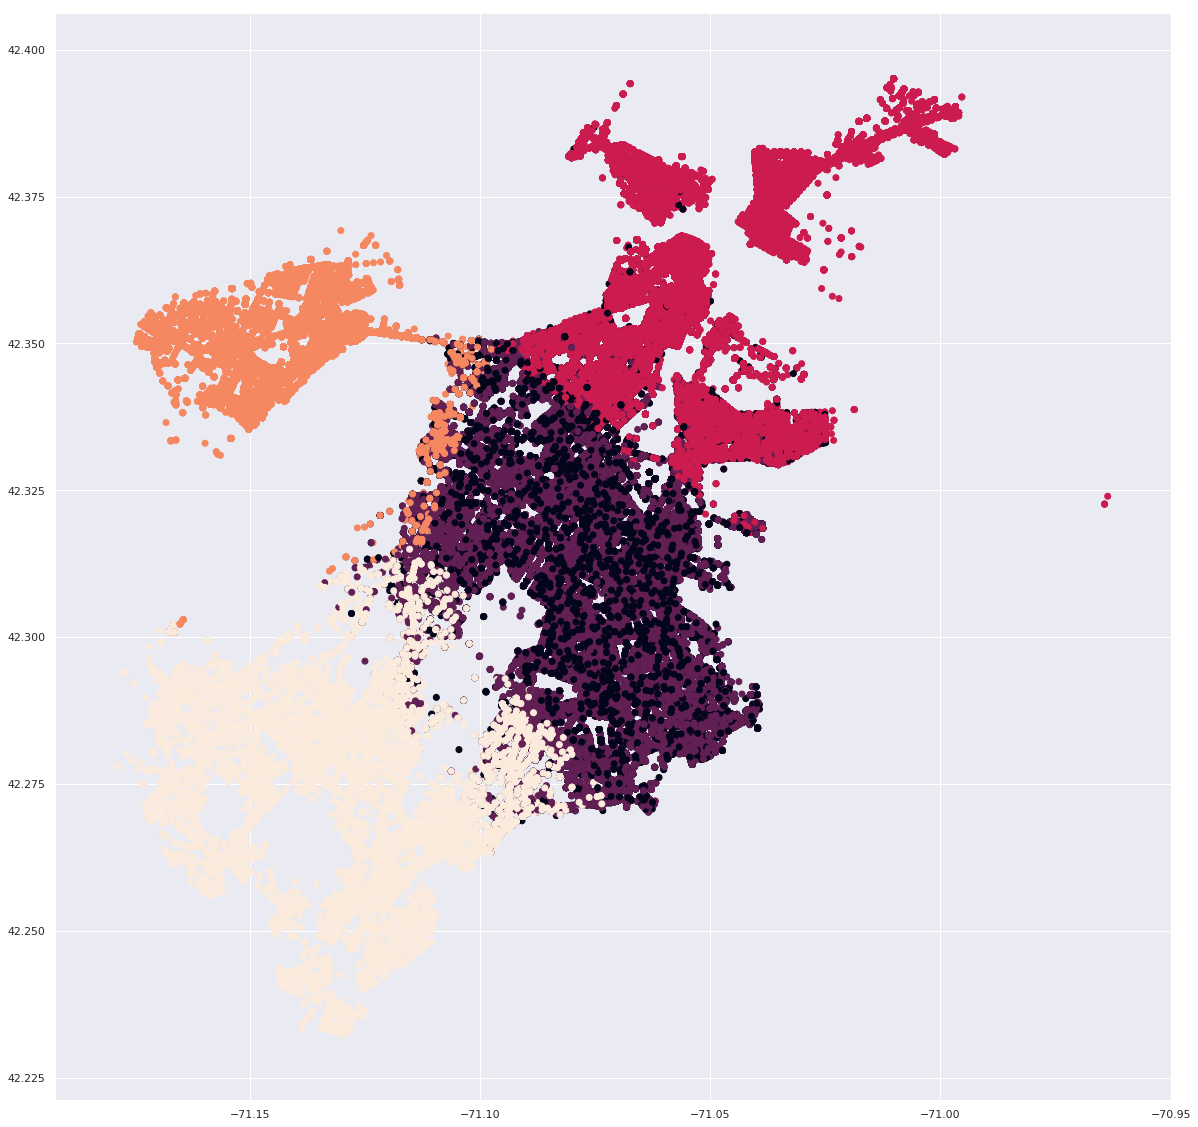

In [28]:
km = KMeans(n_clusters = 5)
km.fit(scale(dataset3))
plt.figure(figsize = (20,20))
plt.scatter(sd3['Long'], sd3['Lat'], c=km.labels_.astype(float))
plt.show()

##### 10 CLusters

Dataset 1

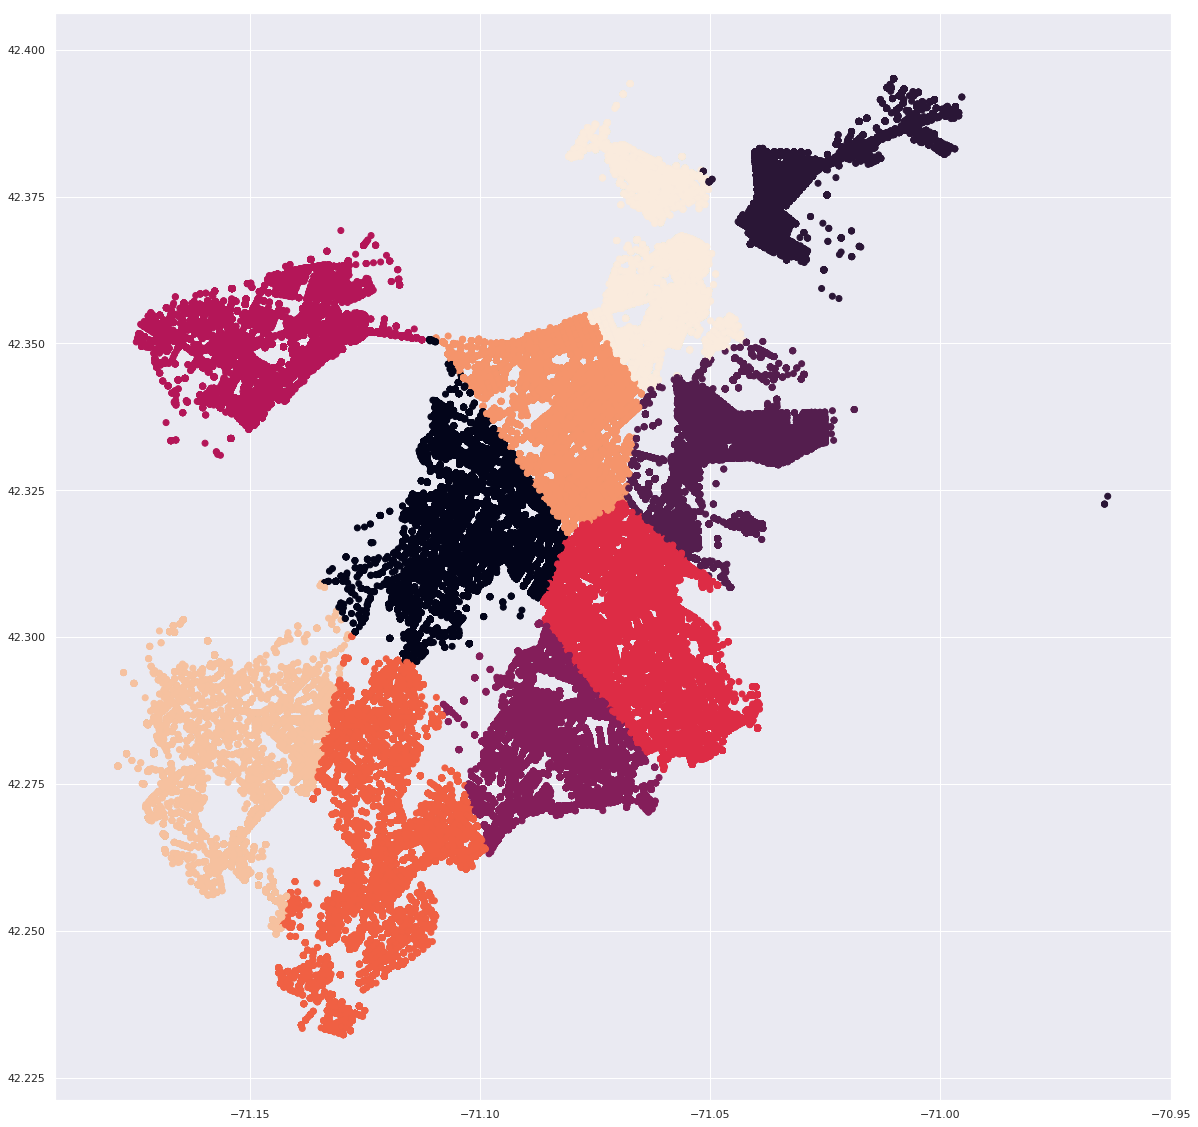

In [29]:
km = KMeans(n_clusters = 10)
km.fit(scale(dataset))
plt.figure(figsize = (20,20))
plt.scatter(sd['Long'], sd['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 2

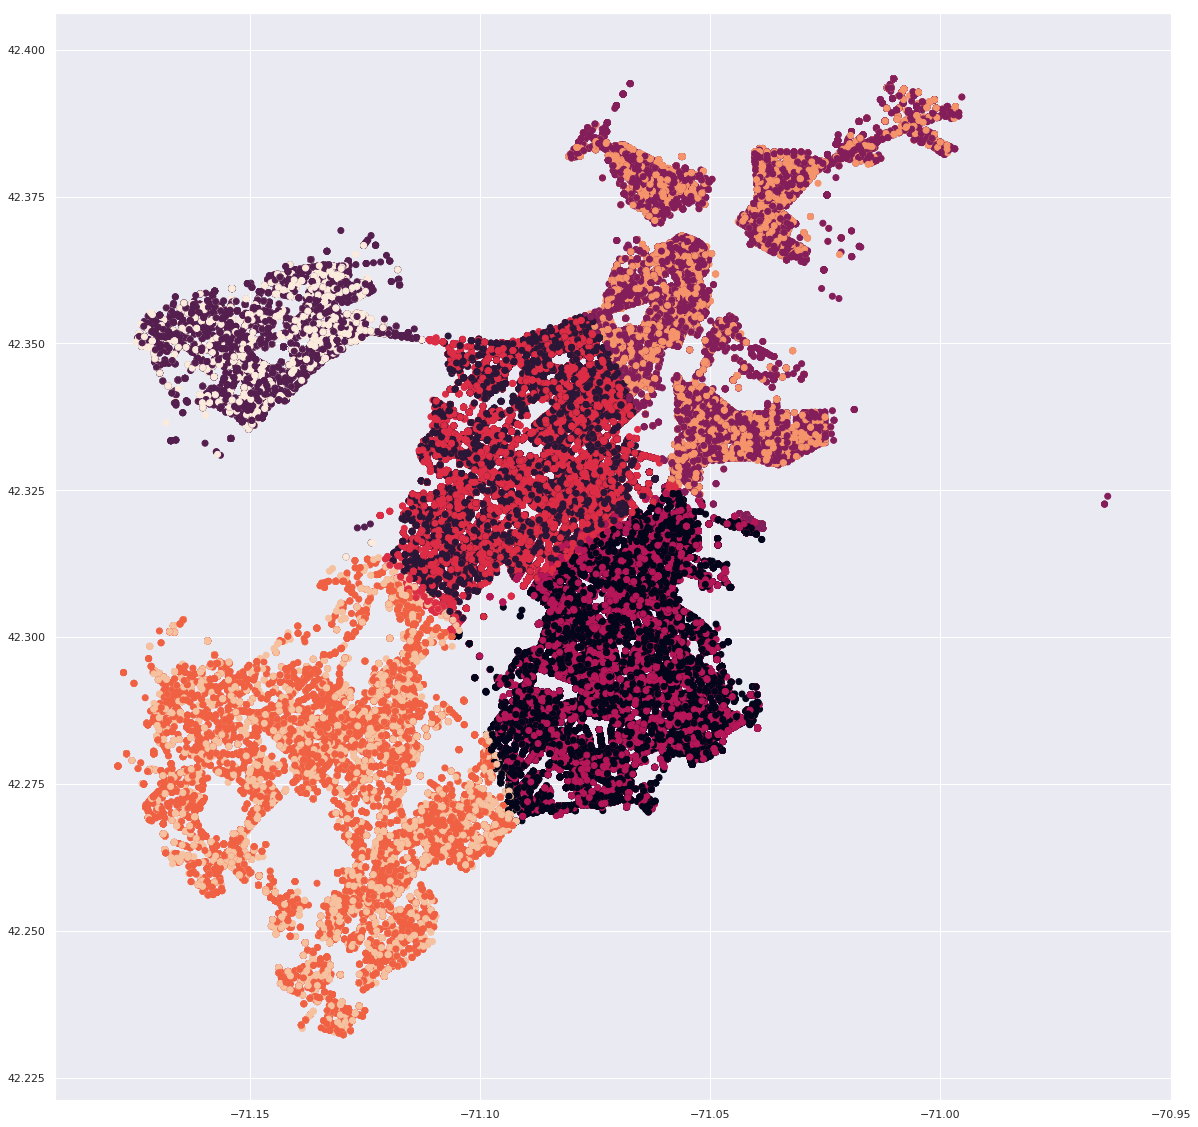

In [30]:
km = KMeans(n_clusters = 10)
km.fit(scale(dataset2))
plt.figure(figsize = (20,20))
plt.scatter(sd2['Long'], sd2['Lat'], c=km.labels_.astype(float))
plt.show()

Dataset 3

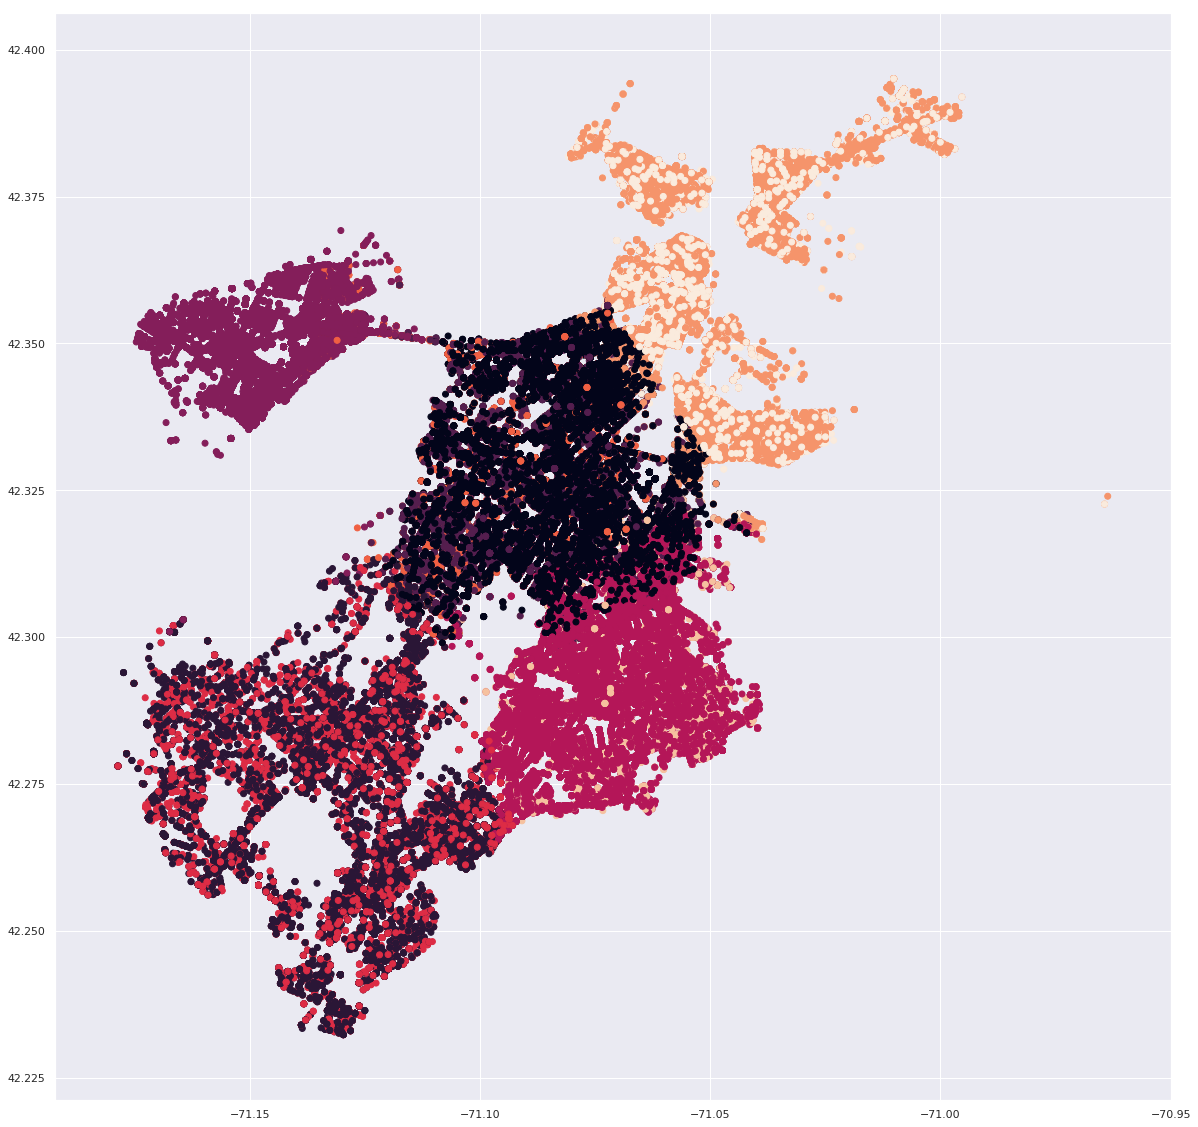

In [31]:
km = KMeans(n_clusters = 10)
km.fit(scale(dataset3))
plt.figure(figsize = (20,20))
plt.scatter(sd3['Long'], sd3['Lat'], c=km.labels_.astype(float))
plt.show()

### BONUS
##### "Χρησιμοποιώντας τη βιβλιοθήκη folium (https://github.com/python-visualization/folium) φτιάξτε έναν interactive χάρτη όπου θα φαίνονται clusters για ένα συγκεκριμένο περιστατικό (για παράδειγμα επιλέγουμε τις γραμμές που έχουν ως περιστατικό “Drug Violation” από τη στήλη OFFENSE_CODE_GROUP)."

In [32]:
import folium
from folium.plugins import MarkerCluster

#### Αλλάξτε τη μεταβλητή offense για την εμφάνιση χάρτη κάποιου άλλου είδους περιστατικό.

In [84]:
offense = 'Drug Violation'

In [85]:
sd = df[['Lat', 'Long', 'OFFENSE_CODE_GROUP']]
sd = sd[sd.Lat > 0.]
sd = sd.loc[sd['OFFENSE_CODE_GROUP'] == offense]

dataset = []
for index, row in sd.iterrows():
    lat = row['Lat']
    lon = row['Long']
    off = row['OFFENSE_CODE_GROUP']
    dataset.append([float(lon), float(lat), off])

dataset = np.array(dataset)

#### Στον χάρτη εμφανίζονται τα πρώτα 2000 σημεία, καθώς με περισσότερα δεν εμφανίζεται καθόλου ο χάρτης.

In [87]:
m = folium.Map(location=[42.33, -71.1], zoom_start=11.5)

marker_cluster = MarkerCluster().add_to(m)

for k in dataset[:2000]:
    location = [float(k[1]), float(k[0])]
    folium.Marker(
        location=location,
        popup='Add popup text here.',
        icon=None,
    ).add_to(marker_cluster)

m